# Custom exploration of Eniac's database

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Functions_module import check_table

In [3]:
orderlines_old = pd.read_csv('data/eniac/orderlines.csv')
products_old = pd.read_csv('data/eniac/products.csv')
orders_old = pd.read_csv('data/eniac/orders.csv')

In [46]:
orderlines = pd.read_csv('data/eniac/orderlines_clean.csv')
products = pd.read_csv('data/eniac/products_clean.csv')
orders = pd.read_csv('data/eniac/orders_clean.csv')
brands = pd.read_csv('data/eniac/brands_clean.csv')

In [20]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

# Orderlines info

In [5]:
# check_table(orderlines)

In [6]:
# check_table(orderlines_old)

# Products info

In [7]:
# check_table(products)

In [8]:
# check_table(products_old)

## Orders info

In [9]:
# check_table(orders)

In [10]:
# check_table(orders_old)

## How many orders are there?

In [19]:
orders.order_id.nunique()

226424

## How many products are there?

In [21]:
products.sku.nunique()

10527

## What period of time do these orders comprise?

In [14]:
orders.created_date.agg(['min', 'max'])

min    2017-01-01 00:07:19
max    2018-03-14 13:58:36
Name: created_date, dtype: object

## How many orders are Completed?

In [40]:
completed_orders = orders.loc[orders.state == 'Completed']

In [41]:
completed_orders

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226064,527042,2018-03-14 11:47:50,18.98,Completed
226092,527070,2018-03-14 11:50:48,24.97,Completed
226096,527074,2018-03-14 11:51:42,24.97,Completed
226118,527096,2018-03-14 11:58:40,34.96,Completed


In [17]:
orders.loc[orders.state == 'Completed'].state.value_counts() / orders.order_id.count()

Completed    0.204448
Name: state, dtype: float64

Completed orders make 20% of all orders

In [32]:
orders_by_state=(
    orders
    .groupby('state')
    .count()
    .reset_index()
)

In [33]:
orders_by_state

,state,order_id,created_date,total_paid
0,Cancelled,7208,7208,7208
1,Completed,46292,46292,46292
2,Pending,14292,14292,14292
3,Place Order,40869,40869,40869
4,Shopping Basket,117763,117763,117763


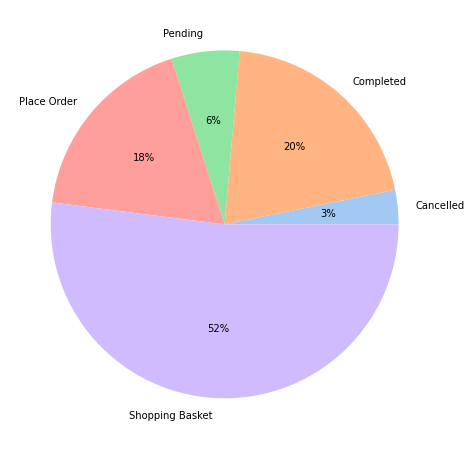

In [37]:
plt.subplots(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:6]
plt.pie(orders_by_state.order_id, labels = orders_by_state.state, colors = colors, autopct='%.0f%%')
plt.show()

## How should revenue be computed?

Revenue for entire database

In [42]:
completed_orders.total_paid.sum()

15814563.919999996

Revenue for each year:

In [44]:
completed_orders.assign(year = orders.created_date.dt.strftime('%Y')).groupby('year')['total_paid'].agg('sum')

year
2017    12339632.82
2018     3474931.10
Name: total_paid, dtype: float64

## Revenue by brands

In [47]:
products_brands =(
    products.assign(short = products.sku.str[0:3])
            .merge(brands,how='left')

)

In [48]:
orderlines_products_brands = (
    orderlines
            .merge(products_brands,how='left')
)

In [52]:
orderlines_products_brands_orders = (
    orderlines_products_brands
                .merge(orders,how='left')
)

In [61]:
orderlines_products_brands_orders

,id,order_id,product_quantity,sku,unit_price,date,total_sum,name,desc,price,promo_price,short,long,created_date,total_paid,state
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,19.99,OTT,Otterbox,2017-01-01 00:07:19,18.99,Shopping Basket
1,1119110,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,399.00,LGE,LG,2017-01-01 00:19:45,399.00,Shopping Basket
2,1119111,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699.00,569.00,PAR,Parrot,2017-01-01 00:20:57,474.05,Shopping Basket
3,1119112,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79.00,63.99,WDT,Western Digital,2017-01-01 00:51:40,68.39,Shopping Basket
4,1119113,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.90,27.99,JBL,JBL,2017-01-01 01:06:38,23.74,Shopping Basket
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292849,1650199,527398,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,42.99,JBL,JBL,2018-03-14 13:57:25,42.99,Shopping Basket
292850,1650200,527399,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,141.58,PAC,Pack,2018-03-14 13:57:34,141.58,Shopping Basket
292851,1650201,527400,2,APP0698,9.99,2018-03-14 13:57:41,19.98,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.00,9.99,APP,Apple,2018-03-14 13:57:41,19.98,Shopping Basket
292852,1650202,527388,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,19.99,BEZ,Be.ez,2018-03-14 13:51:59,34.98,Shopping Basket


In [69]:
completed_orders_big_merge = (
    orderlines_products_brands_orders
        .query("state == 'Completed'")
        .groupby('long')
        .sum('total_sum')
        .reset_index()
        .sort_values('total_paid', ascending = False)
)

In [70]:
completed_orders_big_merge

,long,id,order_id,product_quantity,unit_price,total_sum,price,promo_price,total_paid
6,Apple,19382142491,5825311313,14936,7423376.90,7623827.16,8184493.70,6691446.85,10713308.93
108,Pack,3522059014,1046492187,2706,2382814.42,2437905.86,2882200.60,2328690.18,2689440.09
101,OWC,5025779809,1504291133,4082,456050.31,491337.42,566674.80,467195.47,951536.46
68,LaCie,2925079482,879422031,2244,503885.37,532507.45,563548.39,379402.89,771908.59
164,Western Digital,2573757939,769403271,2550,279095.98,383600.38,343358.66,230621.56,732878.17
...,...,...,...,...,...,...,...,...,...
118,QDos,3478502,945490,3,31.97,31.97,74.97,33.97,54.94
3,Aiino,2329797,634998,2,33.01,33.01,64.98,33.01,53.99
14,BodyGuardz,1620678,514573,1,27.99,27.99,39.99,27.99,47.97
105,Opulus,2312131,627371,2,17.89,17.89,79.98,17.89,36.86


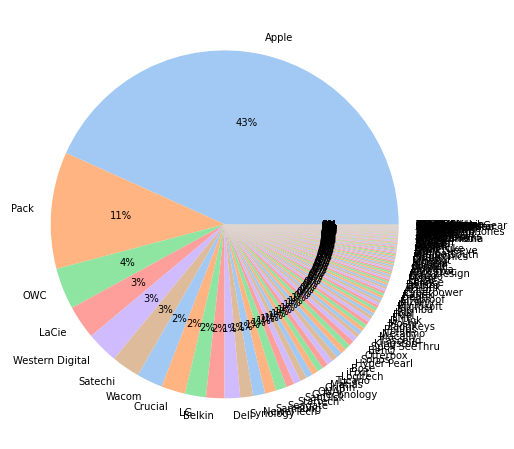

In [73]:
plt.subplots(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:6]
plt.pie(completed_orders_big_merge.total_paid, labels = completed_orders_big_merge['long'], colors = colors, autopct='%.0f%%')
plt.show()

In [109]:
completed_orders_big_merge_by_product = (
    orderlines_products_brands_orders
        .query("state == 'Completed'")
        .groupby('sku')
        .sum('total_sum')
        .reset_index()
        .sort_values('total_paid', ascending = False)
    .head(1000)
)

In [121]:
completed_orders_big_merge_by_product.total_sum.sum()

12336408.989999998

In [120]:
list_of_products = completed_orders_big_merge_by_product.sku.tolist()

In [116]:
products_for_explore = products[products.sku.isin(list_of_products)]

In [119]:
products_for_explore.to_csv('data/eniac/products_to_explore.csv',index=False)

In [104]:
completed_orders_big_merge_by_product['sku'].str[0:3].unique()

array(['APP', 'LGE', 'SAT', 'WDT', 'PAC', 'CAD', 'LIB', 'SAM', 'HTE',
       'CRU', 'NTE', 'MAT', 'WAC', 'AP2', 'DLL', 'SYN', 'SNS', 'OWC',
       'LAC', 'OTT', 'SEA', 'NEA', 'MIC', 'BEL', 'BOS', 'MMW', 'QNA',
       'STA', 'MOX', 'LOG', 'CYB', 'GRT', 'MIN', 'TOS', 'EIZ', 'MAC',
       'LMP', 'WOE', 'SPE', 'BNQ', 'IFX', 'TRA', 'NIE', 'SAN', 'FIT',
       'RAI', 'TRN', 'GTE', 'DJI', 'ZAG', 'WHO', 'AKI', 'PHI', 'KEN',
       'KAN', 'ELG', 'DRO'], dtype=object)

In [110]:
completed_orders_big_merge_by_product.total_sum.sum()

12336408.989999998

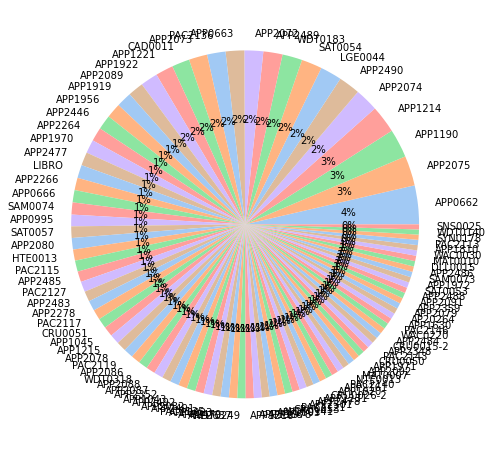

In [95]:
plt.subplots(figsize=(12, 8))
colors = sns.color_palette('pastel')[0:6]
plt.pie(completed_orders_big_merge_by_product.total_paid, labels = completed_orders_big_merge_by_product['sku'], colors = colors, autopct='%.0f%%')
plt.show()